<center>
    <h1> ILI286 - Computación Científica II </h1>
    <h2> Tarea 1 </h2>
    <h2> [S]cientific [C]omputing [T]eam </h2>
    <br>
    <b> Ignacio Sfeir </b><br>
    <b> ignacio.sfeir.alumnos.usm.cl </b><br>
    <b> 201104725-7 </b>
</center>

_Marzo 2017_

# Introducción

En esta primera experiencia se trabajará con diversas librerias de manejo y análisis numérico, como numpy, sympy, scipy y matplotlib. El trabajo y familiarización con estas herramientas permitirán un mejor desarrollo de las próximas tareas, así como un pequeño repaso de los temas vistos en el curso anterior, Computación Científica I.

# Desarrollo y análisis de resultados

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sympy as sym
import scipy as sp
from ipywidgets import interact

from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import CubicSpline

# Pregunta 3

## 3.1

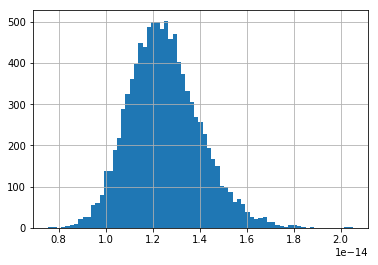

In [9]:
#3.1)
def P3_1():
    error = np.zeros(10000)
    for i in range(10000):
        n = 100
        #generar las matrices con valores en el rango [-1,1]
        matriz = np.random.rand(n, n)*2 - 1
        vector = np.random.rand(n, 1)*2 - 1

        numpy_dot = np.dot(matriz, vector)
        #print (numpy_dot)

        dot = np.zeros((n,1))
        for j in range(n):
            for k in range(n):
                dot[j][0] += matriz[j][k] * vector[k][0]
        #print ("")
        #print (dot)
        
        error[i] = np.linalg.norm(numpy_dot - dot)
    #print (error)
    #print (np.histogram(error))
    plt.hist(error, bins="auto")

    plt.grid(True)
    plt.show()

P3_1()

## 3.2

Una matriz diagonal dominante es aquella en que los valores absolutos de los valores en su diagonal son cada uno los mayores de la fila a la cual pertenecen. Esto puede representarse en el siguiente código:

In [28]:
#3.2)
def dominante(matriz):
    for i in range(len(matriz)):
        if max(matriz[i]) != matriz[i][i]:
            return False
    return True

## 3.3

Se tiene como ejemplo las matrices dominantes $A=\begin{pmatrix}
5 & 3 & 2\\
3 & 8 & 1\\
5 & 2 & 6
\end{pmatrix}$ y $B=\begin{pmatrix}
8 & 4 & 1\\
2 & 14 & 10\\
0 & 9 & 11
\end{pmatrix}$ <br>
Es posible comprobar que son dominantes con la función ya implementada en el putno anterior:

In [21]:
A = np.array([[5,3,2],[3,8,1],[5,2,6]])
print(dominante(A))

True


In [20]:
B = np.array([[8,4,1],[2,14,10],[0,9,11]])
print(dominante(B))

True


Ahora multiplicando ambas.

In [19]:
result = np.dot(A,B)
print(result)
print(dominante(result))

[[ 46  80  57]
 [ 40 133  94]
 [ 44 102  91]]
False


Se puede ver que la matriz resultante NO es dominante, y eso es lo que entrega la función.

## 3.4

### a)

In [31]:
#3.4a)
def P3_4a():
    A = np.array([[1,-1],[1,1]])
    b = np.array([-1,10])
    x = np.linalg.solve(A,b)
    return x

print(P3_4a())

[ 4.5  5.5]


Es decir, la raíz encontrada es $x_1=4.5$ y $x_2=5.5$.

### b)

In [30]:
#3.4b)
def a_j_i(j,i):
    return (i+j)*np.exp(-(i-j))
def P3_4b():
    ec1 = np.ones((1,20))
    ec2 = [[a_j_i(j,i) for i in range (1,21)] for j in range(2,21)]
    A = np.append(ec1,ec2, axis=0)
    b = np.ones(20)
    x = np.linalg.solve(A,b)
    return x

Donde los 20 valores de los $x_i$ son iguales a:

In [27]:
print(P3_4b())

[  1.19738889e+14  -3.45383756e+14  -1.21494565e+15   5.51133574e+15
   1.58006756e+15  -2.25467290e+16   8.04695092e+15  -1.74467720e+17
   3.70106464e+17   9.00502359e+17  -1.37702978e+18   1.97490702e+18
  -8.00105889e+18  -3.77527451e+18  -2.87478045e+19  -4.79750347e+19
   3.41227553e+20   7.27703909e+20  -1.35307791e+21   3.70960456e+20]


## 3.5

In [36]:
#3.5)
def x_i(i):
    return -1.0 + 2.0*(i-1)/999.0
def P3_5():
    func = lambda a: sum([(np.exp(x_i(i)) - a[0] - a[1]*x_i(i)) for i in range(1,1001)])
    res = optimize.minimize(func,(2,2))
    return res

De donde los valores de $a_0$ y $a_1$ son, respectivamente:

In [118]:
print(P3_5().x)

[  3.19718975e+08   1.41958093e+01]


# Pregunta 4

## 4.1

In [38]:
#4.1)
def P4_1():
    sym.mpmath.mp.dps = 30;
    sym.mpmath.mp.pretty = True
    return sym.mpmath.limit(lambda x: (sym.sin(x))/x, 0)

$\displaystyle{\lim_{x\rightarrow 0}\frac{\sin(x)}{x}}$ es igual a:

In [39]:
print(P4_1())

1.0


## 4.2

In [46]:
#4.2)

def P4_2_alt():
    sym.mpmath.mp.dps = 30;
    sym.mpmath.mp.pretty = True
    x,i = sym.symbols('x i')
    return sym.diff(sym.sin(sym.Sum(x**i, (i,1,20)))*sym.cos(sym.Product(sym.log(x+i),(i,1,20))), x)

De donde la derivada de $f(x)=\sin\left(\sum_{i=1}^{20}x^i\right)\cos\left(\prod_{i=1}^{20}\log(x+i)\right)$ es igual a:

In [47]:
print(P4_2_alt())

-sin(Product(log(i + x), (i, 1, 20)))*sin(Sum(x**i, (i, 1, 20)))*Derivative(Product(log(i + x), (i, 1, 20)), x) + cos(Product(log(i + x), (i, 1, 20)))*cos(Sum(x**i, (i, 1, 20)))*Sum(i*x**i/x, (i, 1, 20))


Pero este resultado no desarrolla la derivada de la productoria de sympy (sym.Product) por lo que se realizó de otra forma, entregando un resultado muy extenso, lo cual es esperable dada la complejidad de la función a derivar. El nuevo código y su resultado se muestran a continuación.

In [48]:
def P4_2():
    sym.mpmath.mp.dps = 30;
    sym.mpmath.mp.pretty = True
    x = sym.symbols('x')
    return sym.diff(sym.sin(sum([x**i for i in range(1,21)]))*sym.cos(np.prod([sym.log(x+i) for i in range(1,21)])), x)

print(P4_2())

(20*x**19 + 19*x**18 + 18*x**17 + 17*x**16 + 16*x**15 + 15*x**14 + 14*x**13 + 13*x**12 + 12*x**11 + 11*x**10 + 10*x**9 + 9*x**8 + 8*x**7 + 7*x**6 + 6*x**5 + 5*x**4 + 4*x**3 + 3*x**2 + 2*x + 1)*cos(log(x + 1)*log(x + 2)*log(x + 3)*log(x + 4)*log(x + 5)*log(x + 6)*log(x + 7)*log(x + 8)*log(x + 9)*log(x + 10)*log(x + 11)*log(x + 12)*log(x + 13)*log(x + 14)*log(x + 15)*log(x + 16)*log(x + 17)*log(x + 18)*log(x + 19)*log(x + 20))*cos(x**20 + x**19 + x**18 + x**17 + x**16 + x**15 + x**14 + x**13 + x**12 + x**11 + x**10 + x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**3 + x**2 + x) - (log(x + 1)*log(x + 2)*log(x + 3)*log(x + 4)*log(x + 5)*log(x + 6)*log(x + 7)*log(x + 8)*log(x + 9)*log(x + 10)*log(x + 11)*log(x + 12)*log(x + 13)*log(x + 14)*log(x + 15)*log(x + 16)*log(x + 17)*log(x + 18)*log(x + 19)/(x + 20) + log(x + 1)*log(x + 2)*log(x + 3)*log(x + 4)*log(x + 5)*log(x + 6)*log(x + 7)*log(x + 8)*log(x + 9)*log(x + 10)*log(x + 11)*log(x + 12)*log(x + 13)*log(x + 14)*log(x + 15)*log(x + 16)*log(

# 4.3

Asumiendo que la función dada en el enunciado $f(z)=z^2+1$, donde $z=x+\mathit{i}\,y$ y $\mathit{i}=\sqrt{-1}$
<br>es en realidad $f(z)=z^2+1$, donde $z=x+\mathit{i}$ e $\mathit{i}=\sqrt{-1}$, entonces

In [68]:
#4.3)
def P4_3():
    x,y = sym.symbols('x y')
    i = sym.sqrt(-1)
    z = x + i
    return sym.solve(z**2 + 1)

r, i = P4_3()

In [70]:
print(r)
print(i)

0
-2*I


Sus valores real e imaginario son respectivamente 0 y -2i.

## 4.4

In [60]:
#4.4)
def P4_4_alt():
    a,b,c = sym.symbols('a b c')
    A = sym.Matrix([[a, b],[c,a]])
    inv = A.inv()
    return (A, inv)

A, inv = P4_4_alt()

Sea la matriz A de la forma $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$

Su inversa es:

In [61]:
print(inv)

Matrix([[1/a + b*c/(a**2*(a - b*c/a)), -b/(a*(a - b*c/a))], [-c/(a*(a - b*c/a)), 1/(a - b*c/a)]])


De forma numérica, se toma una matriz de la misma forma que A con valores al azar entre -1 y 1.

In [65]:
def P4_4():
    a,b,c = np.random.rand(3)*2 - 1
    A = sym.Matrix([[a, b],[c,a]])
    inv = A.inv()
    return (A, inv)

A, inv = P4_4()

In [66]:
print(A)

Matrix([[0.128125804995122, 0.0101109068522520], [-0.804365492230431, 0.128125804995122]])


Y su inversa es:

In [67]:
print(inv)

Matrix([[5.21916793675048, -0.411864892140607], [32.7655977391705, 5.21916793675048]])


## 4.5

In [87]:
#4.5)
def P4_5():
    a,b,c = np.random.rand(3)
    A = sym.Matrix([[a, b],[c,a]])
    #vals = A.eigenvals()
    vects = A.eigenvects()
    return (A, vects)

A, vects = P4_5()

Para una matriz A de la forma $A=\begin{pmatrix}
a & b\\
c & a
\end{pmatrix}$ con valores al azar entre 0 y 1:

In [88]:
print(A)

Matrix([[0.351289595577019, 0.430720259578503], [0.448922822315453, 0.351289595577019]])


Sus valores propios son:

In [100]:
print(vects[0][0])
print()
print(vects[1][0])

0.791016959472451

-0.0884377683184135


Ambos con multiplicidad 1.
<br>Y sus vectores propios son

In [99]:
print(vects[0][2])
print()
print(vects[1][2])

[Matrix([
[0.97951661630257],
[             1.0]])]

[Matrix([
[-0.97951661630257],
[              1.0]])]


# Pregunta 5

## 5.1

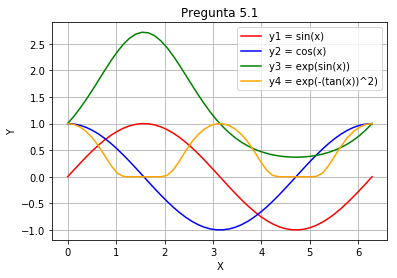

In [102]:
#5.1)
def P5_1():
    x = np.linspace(0,2*np.pi)
    y1 = np.sin(x)
    y2 = np.cos(x)
    y3 = np.exp(np.sin(x))
    y4 = np.exp(-(np.tan(x))**2)

    plt.plot(x, y1, color="red", linestyle="solid", label="y1 = sin(x)")
    plt.plot(x, y2, color="blue", linestyle="solid", label="y2 = cos(x)")
    plt.plot(x, y3, color="green", linestyle="solid", label="y3 = exp(sin(x))")
    plt.plot(x, y4, color="orange", linestyle="solid", label="y4 = exp(-(tan(x))^2)")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Pregunta 5.1")

    plt.legend()
    plt.grid(True)
    
    plt.show()

P5_1()

## 5.2

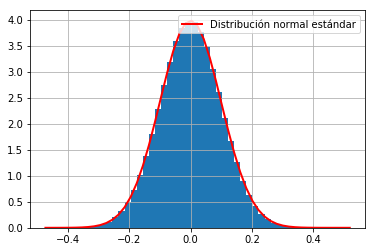

In [105]:
#5.2)
def P5_2():
    M, DE = 0.0, 0.1
    N = np.random.normal(M, DE, 10**6)

    count, bins, ignored = plt.hist(N, bins=50, normed=True)
    plt.plot(bins, 1/(DE * np.sqrt(2*np.pi)) * np.exp(-(bins - M)**2 / (2*DE**2) ), linewidth=2, color='red', label='Distribución normal estándar')
    
    plt.legend()
    plt.grid(True)
    plt.show()
    
P5_2()

Se aprecia claramente que el histograma se ajusta a la curva de distribución normal.

## 5.3

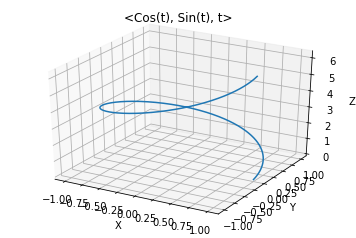

In [106]:
#5.3)
def P5_3():
    fig = plt.figure()
    plot3d = fig.gca(projection='3d')
    
    theta = np.linspace(0, 2*np.pi, 1000)
    x = np.cos(theta)
    y = np.sin(theta)
    plot3d.plot(x, y, theta)

    plot3d.set_xlabel("X")
    plot3d.set_ylabel("Y")
    plot3d.set_zlabel("Z")
    plt.title("<Cos(t), Sin(t), t>")
    
    plt.show()
    
P5_3()

## 5.4

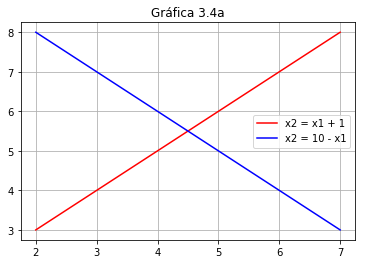

In [108]:
#5.4)
def P5_4():
    x1 = np.linspace(2,7)
    x2_1 = x1 + 1
    x2_2 = 10 - x1

    plt.plot(x1, x2_1, color="red", linestyle="solid", label="x2 = x1 + 1")
    plt.plot(x1, x2_2, color="blue", linestyle="solid", label="x2 = 10 - x1")
    
    plt.title("Gráfica 3.4a")
    plt.legend()
    plt.grid(True)

    plt.show()

P5_4()

Observando la gráfica de la pregunta 3.4a se ve claramente la solución en el punto (4.5, 5.5) tal como se esperaba.

Sin embargo, para la pregunta 3.4b NO se puede realizar el ismo ejercicio ya que al tener mas de 3 variables, su gráfica tendría a su vez más de 3 dimensiones, por lo que no es posible graficarla para verificar las raices de esta forma.

## 5.5

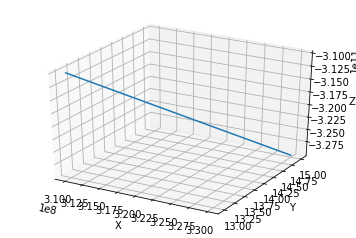

In [109]:
def P5_5():
    fig = plt.figure()
    plot3d = fig.gca(projection='3d')
    
    a0 = np.linspace(3.1e8, 3.3e8, 100)
    a1 = np.linspace(13, 15, 100)
    func = sum([(np.exp(x_i(i)) - a0 - a1*x_i(i)) for i in range(1,1001)])

    plot3d.plot(a0, a1, func)

    plot3d.set_xlabel("X")
    plot3d.set_ylabel("Y")
    plot3d.set_zlabel("Z")
    
    plt.show()
    
P5_5()

# Pregunta 6

## 6.1

Implementando y utilizando el método de bisección para obtener una raíz numericamente, se tiene:

In [112]:
#6.1)
def biseccion (f , a , b, p = 1e-15) :
    l =[]
    i =0
    if not f(a) * f(b) < 0:
        return "Intervalo incorrecto . No se cumple f(a) * f(b) < 0"
    while (b - a)/2.0 > p:
        i +=1
        m = ( a + b) /2.0
        l . append( ( i ,m) )
        if f(m) == 0: return l
        if f(a) * f(m) < 0:
            b = m
        else :
            a = m
    return l

print(biseccion(lambda x: np.sin(x), 3.0, 3.2)[-1])

(47, 3.1415926535897927)


Es decir, se encuentra el valor $3.1415926535897927$ para $\pi$ luego de $47$ iteraciones, con una precisión de $1e-15$

## 6.2

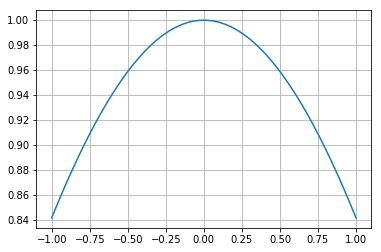

In [113]:
#6.2)
def P6_2():
    x = np.linspace(-1,1)
    y = np.sin(x)/x
    plt.plot(x,y)

    plt.grid(True)
    plt.show()

P6_2()

## 6.3

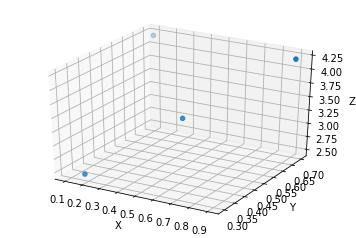

In [8]:
#6.3)
def P6_3():
    fig = plt.figure()
    #plot3d = fig.add_subplot(111, projection='3d')
    plot3d = fig.gca(projection='3d')
    
    x = [0.1,0.5,0.9,0.18]
    y = [0.7,0.5,0.7,0.3]
    z = [4.2,3.3,4.2,2.5]
    
    plot3d.scatter(x, y, z)
    
    plot3d.set_xlabel('X')
    plot3d.set_ylabel('Y')
    plot3d.set_zlabel('Z')

    plt.grid(True)
    plt.show()
    
P6_3()

## 6.4

## 6.5

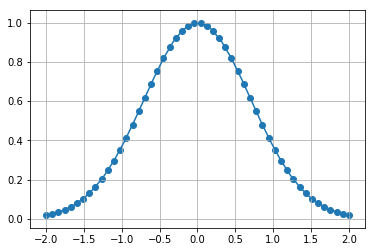

In [115]:
#6.5)
def P6_5():
    x = np.linspace(-2, 2, 32)
    y = np.exp(-x**2)
    #y = [np.exp(-i**2) for i in x]
    cs = CubicSpline(x,y)
    x2 = np.linspace(-2, 2, 50)
    y2 = np.exp(-x2**2)
    plt.scatter(x2,y2) # graficar los puntos de la funcion
    plt.plot(x, cs(x)) # agregar la interpolacion realizada

    plt.grid(True)
    plt.show()
    
P6_5()

El método escogido fue Splines cúbicas, y el resultado fue el esperado ajustandose apropiadamente a los puntos.

## 6.6

# Conclusiones
 En esta experiencia se ha aprendido ha utilizar algunas funcionalidades básicas de las librerias matemáticas disponibles en Python, aprendiendo a crear gráficos en matplotlib, manejando grandes cantidades de datos, acercandose a la razón por la cual los métodos de resolución numérica son tan importantes y necesarios a la hora de resolver problemas, ya que a través de estas aproximaciones se puede simplificar considerablemente el cálculo y procesamiento de datos y funciones costosas.

# Referencias

* http://stattrek.com/probability-distributions/normal.aspx
* https://www.oreilly.com/learning/simple-line-plots-with-matplotlib
* https://plot.ly/matplotlib/histograms/
* http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
* https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.CubicSpline.html